In [2]:
import numpy as np
import pandas as pd

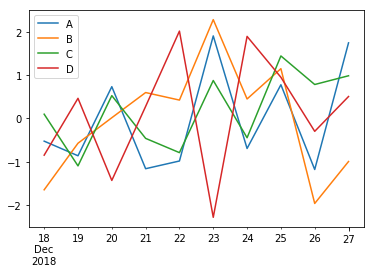

In [6]:
df=pd.DataFrame(np.random.randn(10,4),index=pd.date_range('2018/12/18',periods=10),columns=list('ABCD'))
df.plot()

In [ ]:
# 如果索引由日期组成，则调用gct().autofmt_xdate()来格式化x轴，如上图所示。

# 我们可以使用x和y关键字绘制一列与另一列。

# 绘图方法允许除默认线图之外的少数绘图样式。 这些方法可以作为plot()的kind关键字参数提供。这些包括 -

# bar或barh为条形
# hist为直方图
# boxplot为盒型图
# area为“面积”
# scatter为散点图

*********************************************


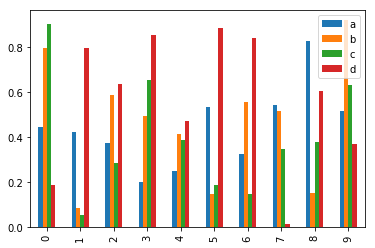

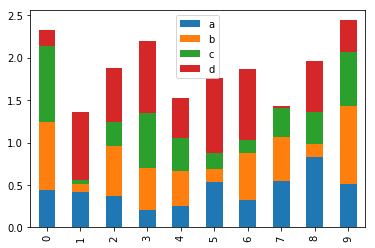

In [8]:
# 条形图

# 现在通过创建一个条形图来看看条形图是什么。条形图可以通过以下方式来创建 -
df=pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.bar()



print('***'*15)
# 要生成一个堆积条形图，通过指定：pass stacked=True
df.plot.bar(stacked=True)

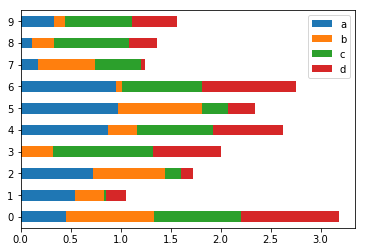

In [9]:
# 要获得水平条形图，使用barh()方法 -
df=pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.barh(stacked=True)

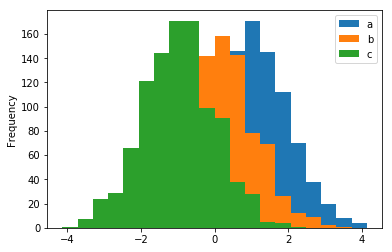

In [10]:
# 直方图

# 可以使用plot.hist()方法绘制直方图。我们可以指定bins的数量值。
df=pd.DataFrame({
    'a':np.random.randn(1000)+1,
    'b':np.random.randn(1000),
    'c':np.random.randn(1000)-1
},columns=['a','b','c'])
df.plot.hist(bins=20)#数轴间隔

In [3]:
# 要为每列绘制不同的直方图，
df=pd.DataFrame({
    'a':np.random.randn(1000)+1,
    'b':np.random.randn(1000),
    'c':np.random.randn(1000)-1
},columns={'a','b','c'})
df.hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F333B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011381A20>]], dtype=object)

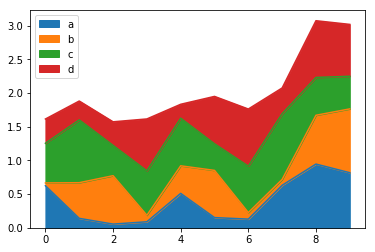

In [13]:
# 箱形图

# Boxplot可以绘制调用Series.box.plot()和DataFrame.box.plot()或DataFrame.boxplot()来可视化每列中值的分布。

# 例如，这里是一个箱形图，表示对[0,1)上的统一随机变量的10次观察的五次试验。

df=pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.area()

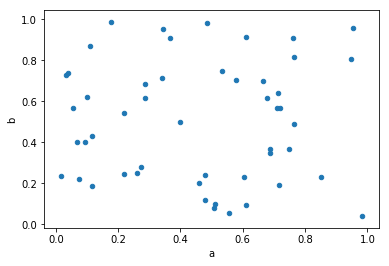

In [5]:
# 散点图形

# # 可以使用DataFrame.plot.scatter()方法创建散点图。
df=pd.DataFrame(np.random.rand(50,4),columns=['a','b','c','d'])
# print(df)
df.plot.scatter(x='a',y='b')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014347DA0>], dtype=object)

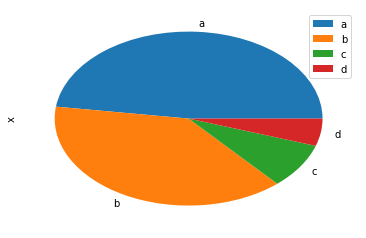

In [15]:
# 饼状图
# 饼状图可以使用DataFrame.plot.pie()方法创建。
df=pd.DataFrame(3*np.random.rand(4),index=['a','b','c','d'],columns=['x'])
df.plot.pie(subplots=True)

In [16]:
# Pandas I/O API是一套像pd.read_csv()一样返回Pandas对象的顶级读取器函数。

# 读取文本文件(或平面文件)的两个主要功能是read_csv()和read_table()。
# 它们都使用相同的解析代码来智能地将表格数据转换为DataFrame对象

# pandas.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer',
# names=None, index_col=None, usecols=None)

In [17]:
# read.csv

# read.csv从csv文件中读取数据并创建一个DataFrame对象。
df=pd.read_csv('temp.csv')
print(df)

   S.No    Name  Age       City  Salary
0     1     Tom   28    Toronto   20000
1     2     Lee   32   HongKong    3000
2     3  Steven   43   Bay Area    8300
3     4     Ram   38  Hyderabad    3900


In [8]:
# 自定义索引
# 可以指定csv文件中的一列来使用index_col定制索引。
df=pd.read_csv('temp.csv',index_col=['S.No'])
print(df)

        Name  Age       City  Salary
S.No                                
1        Tom   28    Toronto   20000
2        Lee   32   HongKong    3000
3     Steven   43   Bay Area    8300
4        Ram   38  Hyderabad    3900


In [20]:
# 转换器
# dtype的列可以作为字典传递。
df=pd.read_csv('temp.csv',dtype={'Salary':np.float64})
print(df.dtypes)

# 默认情况下，Salary列的dtype是int，但结果显示为float，因为我们明确地转换了类型。
# 因此，数据看起来像浮点数 -
print('****'*15)
df=pd.read_csv('temp.csv',dtype={'Salary':np.int})
print(df.dtypes)


S.No        int64
Name       object
Age         int64
City       object
Salary    float64
dtype: object
************************************************************
S.No       int64
Name      object
Age        int64
City      object
Salary     int32
dtype: object


In [21]:
# header_names
# 使用names参数指定标题的名称。
df=pd.read_csv('temp.csv',names=['a','b','c','d'])
print(df)
# 观察可以看到，标题名称附加了自定义名称，但文件中的标题还没有被消除。 现在，使用header参数来删除它。

           a    b          c       d
S.No    Name  Age       City  Salary
1        Tom   28    Toronto   20000
2        Lee   32   HongKong    3000
3     Steven   43   Bay Area    8300
4        Ram   38  Hyderabad    3900


In [22]:
# 如果标题不是第一行，则将行号传递给标题。这将跳过前面的行。

df=pd.read_csv('temp.csv',names=['a','b','c','d'],header=0)#更改列名
print(df)

        a   b          c      d
1     Tom  28    Toronto  20000
2     Lee  32   HongKong   3000
3  Steven  43   Bay Area   8300
4     Ram  38  Hyderabad   3900


In [9]:
# skiprows
# skiprows跳过指定的行数。
pf=pd.read_csv('temp.csv', skiprows=3)# 第二个参数前需要加空格
print(df)


        Name  Age       City  Salary
S.No                                
1        Tom   28    Toronto   20000
2        Lee   32   HongKong    3000
3     Steven   43   Bay Area    8300
4        Ram   38  Hyderabad    3900


In [27]:
# 任何匹配特定值的数据(NaN/缺失值，尽管可以选择任何值)被省略时，稀疏对象被“压缩”。
# 一个特殊的SparseIndex对象跟踪数据被“稀疏”的地方。 这将在一个例子中更有意义。
# 所有的标准Pandas数据结构都应用了to_sparse方法 

In [28]:
ts=pd.Series(np.random.randn(10))
ts[2:-2]=np.nan
sts=ts.to_sparse()
print(sts)

0    0.665512
1    0.009695
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8    0.375677
9   -0.343634
dtype: float64
BlockIndex
Block locations: array([0, 8])
Block lengths: array([2, 2])


In [29]:
# 任何匹配特定值的数据(NaN/缺失值，尽管可以选择任何值)被省略时，稀疏对象被“压缩”。 
# 一个特殊的SparseIndex对象跟踪数据被“稀疏”的地方。 这将在一个例子中更有意义。
# 所有的标准Pandas数据结构都应用了to_sparse方法 -

df=pd.DataFrame(np.random.randn(1000,4))
df.ix[:998]=np.nan
sdf=df.to_sparse()
print(sdf.density)

# 通过调用to_dense可以将任何稀疏对象转换回标准密集形式 -

0.001


d:\python3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [31]:
# 稀疏Dtypes

# 稀疏数据应该具有与其密集表示相同的dtype。
#目前，支持float64，int64和booldtypes。 取决于原始的dtype，fill_value默认值的更改 -

# float64 − np.nan
# int64 − 0
# bool − False
s=pd.Series([1,np.nan,np.nan,np.nan])
print(s)
print('***'*15)
s.to_sparse()
print(s)

0    1.0
1    NaN
2    NaN
3    NaN
dtype: float64
*********************************************
0    1.0
1    NaN
2    NaN
3    NaN
dtype: float64


In [32]:
# 警告和疑难意味着一个看不见的问题。在使用Pandas过程中，需要特别注意的地方。

# 与Pandas一起使用If/Truth语句

# 当尝试将某些东西转换成布尔值时，Pandas遵循了一个错误的惯例。 这种情况发生在使用布尔运算的。
# 目前还不清楚结果是什么。 如果它是真的，因为它不是zerolength？ 
# 错误，因为有错误的值？ 目前还不清楚，Pandas提出了一个ValueError -

if pd.Series([False,True,False]):
    print('I am True')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [33]:
# 在if条件，它不清楚如何处理它。错误提示是否使用None或任何这些。

if pd.Series([False,True,False]).any():
    print('I am any..')

I am any..


In [35]:
# 要在布尔上下文中评估单元素Pandas对象，请使用方法.bool() -
print(pd.Series([True]).bool())


True


In [38]:
# 按位布尔值

# 按位布尔运算符(如==和!=)将返回一个布尔系列，这几乎总是需要的。
s=pd.Series(range(5))
print(s==4)

0    False
1    False
2    False
3    False
4     True
dtype: bool


In [42]:
# isin操作符

# 这将返回一个布尔序列，显示系列中的每个元素是否完全包含在传递的值序列中。
s=pd.Series(list('abcf'))
s=s.isin(['a','b','e'])
print(s)

0     True
1     True
2    False
3    False
dtype: bool


In [45]:
# 重构索引与ix陷阱

# 许多用户会发现自己使用ix索引功能作为从Pandas对象中选择数据的简洁方法 -
df=pd.DataFrame(np.random.randn(6,4),index=list('ABCDEF'),columns=['one','two','three','four'])
print(df)
print('****'*15)
print(df.ix[['B','C','E']])

        one       two     three      four
A -0.419025 -1.311552  0.622811  0.120603
B  1.445890 -0.011293  0.124242  0.691597
C  0.435129  0.811311  0.835262 -1.325947
D  1.389674 -1.933122  1.083677  0.190052
E -0.851417 -1.807572 -0.589115  0.862249
F  0.116614 -1.336917 -1.212442  0.454319
************************************************************
        one       two     three      four
B  1.445890 -0.011293  0.124242  0.691597
C  0.435129  0.811311  0.835262 -1.325947
E -0.851417 -1.807572 -0.589115  0.862249


d:\python3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [49]:
# 这当然在这种情况下完全等同于使用reindex方法 
df=pd.DataFrame(np.random.randn(6,4),columns=['one','two','three','four'],index=list('abcdef'))
print(df)
print('***'*15)
print(df.reindex(['b','c','e']))

# 有人可能会得出这样的结论，ix和reindex是基于这个100％的等价物。 
# 除了整数索引的情况，它是true。例如，上述操作可选地表示为 -

        one       two     three      four
a -1.637880 -0.445453  0.970586 -0.928279
b -0.860312 -0.090263 -1.071705  1.467332
c  1.355701 -1.313008 -0.332573  1.100591
d -0.018015 -1.547597 -0.706920  0.969612
e -0.088618  1.317650  1.315085 -0.430700
f  0.762025  1.305103  1.587966 -0.765179
*********************************************
        one       two     three      four
b -0.860312 -0.090263 -1.071705  1.467332
c  1.355701 -1.313008 -0.332573  1.100591
e -0.088618  1.317650  1.315085 -0.430700


In [51]:
df=pd.DataFrame(np.random.randn(6,4),index=list('abcdef'),columns=['one','two','three','four'])
print(df)
print('*****'*15)
print(df.ix[[1,2,4]])#填充数据的效果
print('****'*15)
print(df.reindex([1,2,4]))

        one       two     three      four
a  0.389091 -0.160317 -0.568184 -0.289852
b  0.237757 -1.362924  1.223765  0.959644
c  0.687082  0.585642 -1.527189  1.195501
d  1.465935 -0.317398  1.343547 -1.226171
e -0.121304 -0.292867 -1.179649 -0.054717
f -0.394936  0.801203 -1.026821 -1.936154
***************************************************************************
        one       two     three      four
b  0.237757 -1.362924  1.223765  0.959644
c  0.687082  0.585642 -1.527189  1.195501
e -0.121304 -0.292867 -1.179649 -0.054717
************************************************************
   one  two  three  four
1  NaN  NaN    NaN   NaN
2  NaN  NaN    NaN   NaN
4  NaN  NaN    NaN   NaN


d:\python3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [52]:
# 由于许多潜在的Pandas用户对SQL有一定的了解，
# 因此本文章旨在提供一些如何使用Pandas执行各种SQL操作的示例。
url='tips.csv'
tips=pd.read_csv(url)
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [54]:
# tips[['total_bill', 'tip', 'smoker', 'time']].head(5)
rs=tips[['total_bill', 'tip', 'smoker', 'time']].head(5)
print(rs)

   total_bill   tip smoker    time
0       16.99  1.01     No  Dinner
1       10.34  1.66     No  Dinner
2       21.01  3.50     No  Dinner
3       23.68  3.31     No  Dinner
4       24.59  3.61     No  Dinner


In [58]:
# 调用没有列名称列表的DataFrame将显示所有列(类似于SQL的*)。


# 数据帧可以通过多种方式进行过滤; 最直观的是使用布尔索引。
rs=tips[tips['time']=='Dinner'].head(5)
print(rs)
# 上述语句将一系列True/False对象传递给DataFrame，并将所有行返回True。

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [60]:
# 通过GroupBy分组
# 此操作将获取整个数据集中每个组的记录数。 例如，一个查询提取性别的数量(即，按性别分组) 
rs=tips.groupby('sex').size()
print(rs)

sex
Female    2
Male      3
dtype: int64


In [62]:
# 前N行

# SQL(MySQL数据库)使用LIMIT返回前n行 -
rs=tips.head(5)
print(rs)

rs=tips[['smoker','day','time']].head(5)
print(rs)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
  smoker  day    time
0     No  Sun  Dinner
1     No  Sun  Dinner
2     No  Sun  Dinner
3     No  Sun  Dinner
4     No  Sun  Dinner


In [80]:
str='''
5 CONCLUSION
We have presented RPNs for efficient and accurate region
proposal generation. By sharing convolutional features
with the down-stream detection network, the region proposal step is nearly cost-free. Our method enables a unified, deep-learning-based object detection system to run
at 5-17 fps. The learned RPN also improves region proposal quality and thus the overall object detection
accuracy.
'''
str=str.replace('\n','')
print(str)

5 CONCLUSIONWe have presented RPNs for efficient and accurate regionproposal generation. By sharing convolutional featureswith the down-stream detection network, the region proposal step is nearly cost-free. Our method enables a unified, deep-learning-based object detection system to runat 5-17 fps. The learned RPN also improves region proposal quality and thus the overall object detectionaccuracy.


dfgdsfgdfg



## fdgkdflgjdlg